# Лабораторая работа 4.06
# Определение размера щели по картине дифракции Фраунгофера 

## Выполнил: Коняхин Всеволод Владимирович, M32051

## Краткие теоретические сведения
Явления дифракции принято классифицировать в зависимости от расстояний
источника и точки наблюдения (экрана) от препятствия, поставленного па пути
распространения света. Если эти расстояния очень велики (бесконечно велики), то
дифракция называется дифракцией в параллельных лучах или дифракцией
Фраунгофера. В противоположном случае говорят о дифракции в непараллельных
лучах или дифракции Френеля    

Наиболее простым случаем дифракции Фраунгофера является дифракция на
узкой щели заданной ширины b. Высота щели считается стремящейся к
бесконечности. Несмотря на простоту описания, данный случай имеет в то же
время большую практическую значимость, поскольку полученные результаты и
зависимости используются для описания дифракции на множестве одинаковых
щелей, т.е.решетках, прямоугольных отверстиях и т.д.     

## Цель работы 
Определение ширины щели по картине дифракции в дальней зоне. 

## Рабочие формулы и исходные данные

### Формулы

$Z = x_{Э} - x_{О}$    

$\Delta x = x_{m+1} - x_{m} = \frac{\lambda}{b} \cdot Z$

$K = \frac{\lambda}{b}$

### Исходные данные
Длина волны $\lambda = (632.82 \pm 0.01)$ нм

## Схема установки 

Ниже представлена оптическая схема опыта:    

![Схема опыта](img/scheme.png)

Так выглядит лабораторная установка:

![Вид лабораторной установки](img/setting.png)


## Результаты измерений и расчеты

In [2]:
import sympy
import scipy
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
%matplotlib inline

### Координаты последовательных минимумов (в мм) при разных положениях объекта 32

In [3]:
df32 = pd.DataFrame({'X объекта, мм': [220, 270, 320, 370, 420],
                     '$x_{m1}$, мм' : [19, 18, 17, 16, 16],
                     '$x_{m2}$, мм' : [39, 34, 34, 32, 31],
                     '$x_{m3}$, мм' : [59, 53, 52, 48, 47],
                     '$x_{m4}$, мм' : [78, 74, 69, 64, 62],
                     '$x_{m5}$, мм' : [98, 93, 87, 81, 78]})

x_screen = 1200

alpha = 632.82 * 10 ** (-9)
delta_alpha = 0.01 * 10 ** (-9)

df32

,"X объекта, мм","$x_{m1}$, мм","$x_{m2}$, мм","$x_{m3}$, мм","$x_{m4}$, мм","$x_{m5}$, мм"
0,220,19,39,59,78,98
1,270,18,34,53,74,93
2,320,17,34,52,69,87
3,370,16,32,48,64,81
4,420,16,31,47,62,78


In [4]:
print('Координата экрана, {} мм'.format(x_screen))

Координата экрана, 1200 мм


Посчитаем расстояние $Z$, период дифракционной картины $\Delta x$:    
$Z = x_{Э} - x_{О}$         
$\Delta x = \frac{x_{min\space max} - x_{min\space min}}{number\space of\space minimums}$  

### Расстояние между объектом и экраном (Z) и период дифференционной картины (ΔX) при различных координатах объекта 32

In [5]:
df32_calc = pd.DataFrame({'X объекта, мм': [220, 270, 320, 370, 420]})
df32_calc['Z, мм'] = x_screen - df32_calc['X объекта, мм']
df32_calc['$\Delta x$, мм'] = (df32['$x_{m5}$, мм'] - df32['$x_{m1}$, мм']) / 5
df32_calc

,"X объекта, мм","Z, мм","$\Delta x$, мм"
0,220,980,15.8
1,270,930,15.0
2,320,880,14.0
3,370,830,13.0
4,420,780,12.4


### Координаты последовательных минимумов (в мм) при разных положениях объекта 33

In [6]:
df33 = pd.DataFrame({'X объекта, мм': [170, 220, 270, 320, 370],
                     '$x_{m1}$, мм' : [13, 12, 12, 11, 11],
                     '$x_{m2}$, мм' : [26, 25, 24, 22, 21],
                     '$x_{m3}$, мм' : [39, 37, 35, 33, 31],
                     '$x_{m4}$, мм' : [52, 49, 47, 44, 42],
                     '$x_{m5}$, мм' : [65, 62, 59, 56, 53]})

df33

,"X объекта, мм","$x_{m1}$, мм","$x_{m2}$, мм","$x_{m3}$, мм","$x_{m4}$, мм","$x_{m5}$, мм"
0,170,13,26,39,52,65
1,220,12,25,37,49,62
2,270,12,24,35,47,59
3,320,11,22,33,44,56
4,370,11,21,31,42,53


### Расстояние между объектом и экраном (Z) и период дифференционной картины (ΔX) при различных координатах объекта 33

In [7]:
df33_calc = pd.DataFrame({'X объекта, мм': [170, 220, 270, 320, 370]})
df33_calc['Z, мм'] = x_screen - df33_calc['X объекта, мм']
df33_calc['$\Delta x$, мм'] = (df33['$x_{m5}$, мм'] - df33['$x_{m1}$, мм']) / 5
df33_calc

,"X объекта, мм","Z, мм","$\Delta x$, мм"
0,170,1030,10.4
1,220,980,10.0
2,270,930,9.4
3,320,880,9.0
4,370,830,8.4


### Построения аппроксимирующей прямой 
Для этого обучим линейную регрессию на $\Delta x$ от $Z$:

In [10]:
from sklearn import linear_model

regr_32 = linear_model.LinearRegression()
X_32 = np.array(df32_calc['Z, мм']).reshape(-1, 1)
y_32 = np.array(df32_calc['$\Delta x$, мм'])
regr_32.fit(X_32, y_32)

regr_33 = linear_model.LinearRegression()
X_33 = np.array(df33_calc['Z, мм']).reshape(-1, 1)
y_33 = np.array(df33_calc['$\Delta x$, мм'])
regr_33.fit(X_33, y_33)

print('Для объекта 32, K = {:.4f}, b = {:.3f}'.format(regr_32.coef_[0], regr_32.intercept_))
print('Для объекта 33, K = {:.2f}, b = {:.3f}'.format(regr_33.coef_[0], regr_33.intercept_))

Для объекта 32, K = 0.0176, b = -1.448
Для объекта 33, K = 0.01, b = 0.140


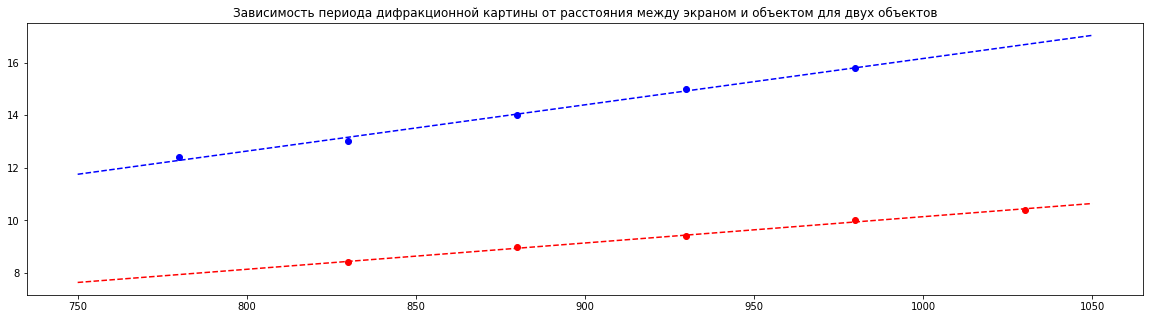

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Зависимость периода дифракционной картины от расстояния между экраном и объектом для двух объектов')
X_33 = X_33.reshape(5)
ax.scatter(X_33, y_33, c='r')
k, b = regr_33.coef_[0], regr_33.intercept_
x = np.linspace(750, 1050, 50)
ax.plot(x, np.polyval([k, b], x), 'r--')

X_32 = X_32.reshape(5)
ax.scatter(X_32, y_32, c='b')
k, b = regr_32.coef_[0], regr_32.intercept_
x = np.linspace(750, 1050, 50)
ax.plot(x, np.polyval([k, b], x), 'b--')

plt.show()

Найдем ширину щели для каждого объекта 32 и 33:    
$b = \frac{\lambda}{K}$

In [19]:
b_32 = alpha / regr_32.coef_[0] 
b_33 = alpha / regr_33.coef_[0]

print('Ширина щели для объекта 32: {:.2f} мкм'.format(b_32 * 10 ** 6))
print('Ширина щели для объекта 33: {:.2f} мкм'.format(b_33 * 10 ** 6))

Ширина щели для объекта 32: 35.96 мкм
Ширина щели для объекта 33: 63.28 мкм
